In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
merged_data = transactions.merge(customers, on='CustomerID', how='left')


In [4]:
customer_profiles = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',        # Total spending
    'Quantity': 'sum',          # Total products purchased
    'Region': lambda x: x.mode()[0],  # Most common region
    'SignupDate': 'min'         # Signup date
}).reset_index()

In [5]:
customer_profiles['SignupDate'] = pd.to_datetime(customer_profiles['SignupDate'])
customer_profiles['DaysSinceSignup'] = (customer_profiles['SignupDate'].max() - customer_profiles['SignupDate']).dt.days
customer_profiles.drop(columns=['SignupDate'], inplace=True)

In [6]:
customer_profiles = pd.get_dummies(customer_profiles, columns=['Region'], drop_first=True)


In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_profiles.iloc[:, 1:])  # Exclude 'CustomerID'

In [37]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [38]:
customer_profiles['Cluster'] = clusters

In [39]:
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.2007118223931241


In [40]:
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3300225711342411


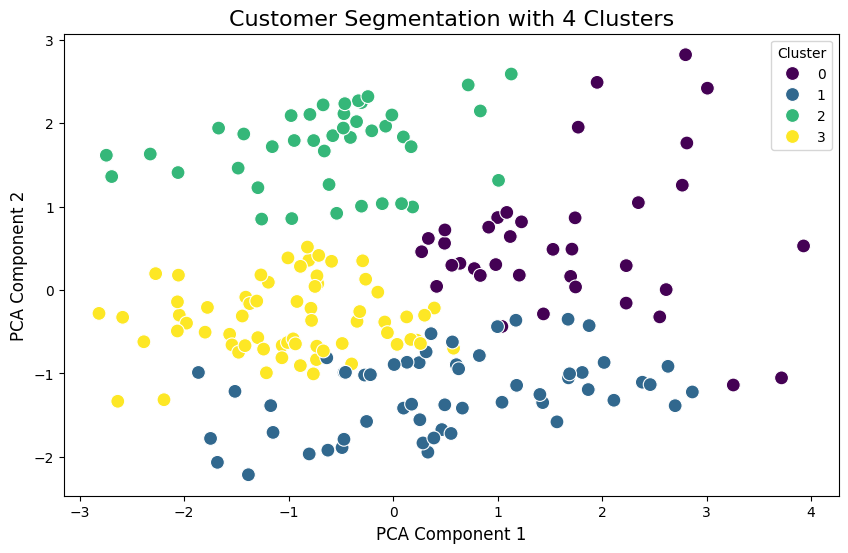

In [43]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=customer_profiles['Cluster'],
    palette='viridis',
    s=100
)
plt.title(f'Customer Segmentation with {n_clusters} Clusters', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.show()
